In [5]:
%matplotlib inline

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
from astropy.io.fits import Column
from datetime import datetime
import matplotlib.pyplot as plt
import os
import warnings
import requests

In [2]:
def download_from_dropbox(url):
    
    local_filename = "{:}".format(url.split("/")[-1].split("?")[0])
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                f.flush()
            
    return local_filename

In [12]:
# zeta parameters
zeta_fname = download_from_dropbox("https://www.dropbox.com/s/ax8sclh0r34oxrq/zeta_parameters.fits?dl=1")
zeta_params=Table.read(zeta_fname)
slope = zeta_params['slope'][0]
intercept=zeta_params['intercept'][0]

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [45]:
hubble_fname = download_from_dropbox("https://www.dropbox.com/s/bfoa17lz23976je/input_for_hubble_debiased_catalog.fits?dl=1")
votes_data=Table.read(hubble_fname)

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [47]:
subjects=set(votes_data['OBJNO'])

In [33]:
#Zeta-hat function for computing debiased values
z0 = 0.3 # we're correcting to redshift 0.3

def fhat_mel(f,z,z0,zeta_hat):
    
    val = 1. - (1. - f)*np.exp(-(z - z0)/ zeta_hat)
    
    return val
#assume zeta_hat is a linear function of surface brightness
def zeta_hat_lin(SB):
    
    val = 10.**((SB*slope) + intercept)
    return val

In [48]:
#And here we define our new table!
intcolumn = np.zeros(len(subjects),dtype=int)
floatcolumn = np.zeros(len(subjects),dtype=float)
strcolumn = np.array([' ']*len(subjects),dtype='S24')
   #S24=24 character string 
    #c01 = Column(name='num_classifications', format='J', array=floatcolumn)          # c05 = c01, by definition

#format for Columns: D = double precision floating point, J = integer
c00 = Column(name='OBJNO', format='A24', array=strcolumn) 
c00t1 = Column(name='total_count',format='J',array=intcolumn)           #c00t1 = c01a1a, by definition
c00t2 = Column(name='total_weight',format='D',array=floatcolumn)

#Columns for Task 01 "Smooth or features"
c01cat = Column(name='Correctable_Category', format = 'A24', array=strcolumn)
c01a1a = Column(name='t01_smooth_or_features_a01_smooth_count', format='J', array=intcolumn)
c01a1b = Column(name='t01_smooth_or_features_a01_smooth_weight', format='D', array=floatcolumn)
c01a1c = Column(name='t01_smooth_or_features_a01_smooth_fraction', format='D', array=floatcolumn)
c01a1d = Column(name='t01_smooth_or_features_a01_smooth_weighted_fraction', format='D', array=floatcolumn)
c01a1e = Column(name='t01_smooth_or_features_a01_smooth_debiased_fraction', format='D', array=floatcolumn)
c01a1f = Column(name='t01_smooth_or_features_a01_smooth_lower_limit', format='D',array=floatcolumn)
c01a1g = Column(name='t01_smooth_or_features_a01_smooth_upper_limit', format='D',array=floatcolumn)
c01a1h = Column(name='t01_smooth_or_features_a01_smooth_best_fraction',format='D',array=floatcolumn)


c01a2a = Column(name='t01_smooth_or_features_a02_features_or_disk_count', format='J', array=intcolumn)
c01a2b = Column(name='t01_smooth_or_features_a02_features_or_disk_weight', format='D', array=floatcolumn)
c01a2c = Column(name='t01_smooth_or_features_a02_features_or_disk_fraction', format='D', array=floatcolumn)
c01a2d = Column(name='t01_smooth_or_features_a02_features_or_disk_weighted_fraction', format='D', array=floatcolumn)
c01a2e = Column(name='t01_smooth_or_features_a02_features_or_disk_debiased_fraction', format='D', array=floatcolumn)
c01a2f = Column(name='t01_smooth_or_features_a02_features_or_disk_lower_limit', format='D',array=floatcolumn)
c01a2g = Column(name='t01_smooth_or_features_a02_features_or_disk_upper_limit', format='D',array=floatcolumn)
c01a2h = Column(name='t01_smooth_or_features_a02_features_or_disk_best_fraction',format='D',array=floatcolumn)

c01a3a = Column(name='t01_smooth_or_features_a03_star_or_artifact_count', format='J', array=intcolumn)
c01a3b = Column(name='t01_smooth_or_features_a03_star_or_artifact_weight', format='D', array=floatcolumn)
c01a3c = Column(name='t01_smooth_or_features_a03_star_or_artifact_fraction', format='D', array=floatcolumn)
c01a3d = Column(name='t01_smooth_or_features_a03_star_or_artifact_weighted_fraction', format='D', array=floatcolumn)

c01t1 = Column(name='t01_smooth_or_features_total_count', format='J', array=intcolumn)
c01t2 = Column(name='t01_smooth_or_features_total_weight', format='D', array=floatcolumn)


#Columns for Task 02 "Edge on"
c02a1a = Column(name='t02_edgeon_a01_yes_count', format='J', array=intcolumn)
c02a1b = Column(name='t02_edgeon_a01_yes_weight', format='D', array=floatcolumn)
c02a1c = Column(name='t02_edgeon_a01_yes_fraction', format='D', array=floatcolumn)
c02a1d = Column(name='t02_edgeon_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c02a2a = Column(name='t02_edgeon_a02_no_count', format='J', array=intcolumn)
c02a2b = Column(name='t02_edgeon_a02_no_weight', format='D', array=floatcolumn)
c02a2c = Column(name='t02_edgeon_a02_no_fraction', format='D', array=floatcolumn)
c02a2d = Column(name='t02_edgeon_a02_no_weighted_fraction', format='D', array=floatcolumn)

c02t1 = Column(name='t02_edgeon_total_count', format='J', array=intcolumn)
c02t2 = Column(name='t02_edgeon_total_weight', format='D', array=floatcolumn)


#Columns for Task 03 "Bar"
c03a1a = Column(name='t03_bar_a01_bar_count', format='J', array=intcolumn)
c03a1b = Column(name='t03_bar_a01_bar_weight', format='D', array=floatcolumn)
c03a1c = Column(name='t03_bar_a01_bar_fraction', format='D', array=floatcolumn)
c03a1d = Column(name='t03_bar_a01_bar_weighted_fraction', format='D', array=floatcolumn)

c03a2a = Column(name='t03_bar_a02_no_bar_count', format='J', array=intcolumn)
c03a2b = Column(name='t03_bar_a02_no_bar_weight', format='D', array=floatcolumn)
c03a2c = Column(name='t03_bar_a02_no_bar_fraction', format='D', array=floatcolumn)
c03a2d = Column(name='t03_bar_a02_no_bar_weighted_fraction', format='D', array=floatcolumn)

c03t1 = Column(name='t03_bar_total_count', format='J', array=intcolumn)
c03t2 = Column(name='t03_bar_total_weight', format='D', array=floatcolumn)


#Columns for Task 04 "Spiral Arms"
c04a1a = Column(name='t04_spiral_a01_spiral_count', format='J', array=intcolumn)
c04a1b = Column(name='t04_spiral_a01_spiral_weight', format='D', array=floatcolumn)
c04a1c = Column(name='t04_spiral_a01_spiral_fraction', format='D', array=floatcolumn)
c04a1d = Column(name='t04_spiral_a01_spiral_weighted_fraction', format='D', array=floatcolumn)

c04a2a = Column(name='t04_spiral_a02_no_spiral_count', format='J', array=intcolumn)
c04a2b = Column(name='t04_spiral_a02_no_spiral_weight', format='D', array=floatcolumn)
c04a2c = Column(name='t04_spiral_a02_no_spiral_fraction', format='D', array=floatcolumn)
c04a2d = Column(name='t04_spiral_a02_no_spiral_weighted_fraction', format='D', array=floatcolumn)

c04t1 = Column(name='t04_spiral_total_count', format='J', array=intcolumn)
c04t2 = Column(name='t04_spiral_total_weight', format='D', array=floatcolumn)


#Columns for Task 05 "Bulge Prominence"
c05a1a = Column(name='t05_bulge_prominence_a01_no_bulge_count', format='J', array=intcolumn)
c05a1b = Column(name='t05_bulge_prominence_a01_no_bulge_weight', format='D', array=floatcolumn)
c05a1c = Column(name='t05_bulge_prominence_a01_no_bulge_fraction', format='D', array=floatcolumn)
c05a1d = Column(name='t05_bulge_prominence_a01_no_bulge_weighted_fraction', format='D', array=floatcolumn)

c05a2a = Column(name='t05_bulge_prominence_a02_just_noticeable_count', format='J', array=intcolumn)
c05a2b = Column(name='t05_bulge_prominence_a02_just_noticeable_weight', format='D', array=floatcolumn)
c05a2c = Column(name='t05_bulge_prominence_a02_just_noticeable_fraction', format='D', array=floatcolumn)
c05a2d = Column(name='t05_bulge_prominence_a02_just_noticeable_weighted_fraction', format='D', array=floatcolumn)

c05a3a = Column(name='t05_bulge_prominence_a03_obvious_count', format='J', array=intcolumn)
c05a3b = Column(name='t05_bulge_prominence_a03_obvious_weight', format='D', array=floatcolumn)
c05a3c = Column(name='t05_bulge_prominence_a03_obvious_fraction', format='D', array=floatcolumn)
c05a3d = Column(name='t05_bulge_prominence_a03_obvious_weighted_fraction', format='D', array=floatcolumn)

c05a4a = Column(name='t05_bulge_prominence_a04_dominant_count', format='J', array=intcolumn)
c05a4b = Column(name='t05_bulge_prominence_a04_dominant_weight', format='D', array=floatcolumn)
c05a4c = Column(name='t05_bulge_prominence_a04_dominant_fraction', format='D', array=floatcolumn)
c05a4d = Column(name='t05_bulge_prominence_a04_dominant_weighted_fraction', format='D', array=floatcolumn)

c05t1 = Column(name='t05_bulge_prominence_total_count', format='J', array=intcolumn)
c05t2 = Column(name='t05_bulge_prominence_total_weight', format='D', array=floatcolumn)


#Columns for Task 06 "Odd"
c06a1a = Column(name='t06_odd_a01_yes_count', format='J', array=intcolumn)
c06a1b = Column(name='t06_odd_a01_yes_weight', format='D', array=floatcolumn)
c06a1c = Column(name='t06_odd_a01_yes_fraction', format='D', array=floatcolumn)
c06a1d = Column(name='t06_odd_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c06a2a = Column(name='t06_odd_a02_no_count', format='J', array=intcolumn)
c06a2b = Column(name='t06_odd_a02_no_weight', format='D', array=floatcolumn)
c06a2c = Column(name='t06_odd_a02_no_fraction', format='D', array=floatcolumn)
c06a2d = Column(name='t06_odd_a02_no_weighted_fraction', format='D', array=floatcolumn)

c06t1 = Column(name='t06_odd_total_count', format='J', array=intcolumn)
c06t2 = Column(name='t06_odd_total_weight', format='D', array=floatcolumn)

#Columns for Task 07 "Rounded"
c07a1a = Column(name='t07_rounded_a01_completely_round_count', format='J', array=intcolumn)
c07a1b = Column(name='t07_rounded_a01_completely_round_weight', format='D', array=floatcolumn)
c07a1c = Column(name='t07_rounded_a01_completely_round_fraction', format='D', array=floatcolumn)
c07a1d = Column(name='t07_rounded_a01_completely_round_weighted_fraction', format='D', array=floatcolumn)

c07a2a = Column(name='t07_rounded_a02_in_between_count', format='J', array=intcolumn)
c07a2b = Column(name='t07_rounded_a02_in_between_weight', format='D', array=floatcolumn)
c07a2c = Column(name='t07_rounded_a02_in_between_fraction', format='D', array=floatcolumn)
c07a2d = Column(name='t07_rounded_a02_in_between_weighted_fraction', format='D', array=floatcolumn)

c07a3a = Column(name='t07_rounded_a03_cigar_shaped_count', format='J', array=intcolumn)
c07a3b = Column(name='t07_rounded_a03_cigar_shaped_weight', format='D', array=floatcolumn)
c07a3c = Column(name='t07_rounded_a03_cigar_shaped_fraction', format='D', array=floatcolumn)
c07a3d = Column(name='t07_rounded_a03_cigar_shaped_weighted_fraction', format='D', array=floatcolumn)

c07t1 = Column(name='t07_rounded_total_count', format='J', array=intcolumn)
c07t2 = Column(name='t07_rounded_total_weight', format='D', array=floatcolumn)

#Columns for Task 08 "Odd Feature"
c08a1a = Column(name='t08_odd_feature_a01_ring_count', format='J', array=intcolumn)
c08a1b = Column(name='t08_odd_feature_a01_ring_weight', format='D', array=floatcolumn)
c08a1c = Column(name='t08_odd_feature_a01_ring_fraction', format='D', array=floatcolumn)
c08a1d = Column(name='t08_odd_feature_a01_ring_weighted_fraction', format='D', array=floatcolumn)

c08a2a = Column(name='t08_odd_feature_a02_lens_or_arc_count', format='J', array=intcolumn)
c08a2b = Column(name='t08_odd_feature_a02_lens_or_arc_weight', format='D', array=floatcolumn)
c08a2c = Column(name='t08_odd_feature_a02_lens_or_arc_fraction', format='D', array=floatcolumn)
c08a2d = Column(name='t08_odd_feature_a02_lens_or_arc_weighted_fraction', format='D', array=floatcolumn)

c08a3a = Column(name='t08_odd_feature_a03_disturbed_count', format='J', array=intcolumn)
c08a3b = Column(name='t08_odd_feature_a03_disturbed_weight', format='D', array=floatcolumn)
c08a3c = Column(name='t08_odd_feature_a03_disturbed_fraction', format='D', array=floatcolumn)
c08a3d = Column(name='t08_odd_feature_a03_disturbed_weighted_fraction', format='D', array=floatcolumn)

c08a4a = Column(name='t08_odd_feature_a04_irregular_count', format='J', array=intcolumn)
c08a4b = Column(name='t08_odd_feature_a04_irregular_weight', format='D', array=floatcolumn)
c08a4c = Column(name='t08_odd_feature_a04_irregular_fraction', format='D', array=floatcolumn)
c08a4d = Column(name='t08_odd_feature_a04_irregular_weighted_fraction', format='D', array=floatcolumn)

c08a5a = Column(name='t08_odd_feature_a05_other_count', format='J', array=intcolumn)
c08a5b = Column(name='t08_odd_feature_a05_other_weight', format='D', array=floatcolumn)
c08a5c = Column(name='t08_odd_feature_a05_other_fraction', format='D', array=floatcolumn)
c08a5d = Column(name='t08_odd_feature_a05_other_weighted_fraction', format='D', array=floatcolumn)

c08a6a = Column(name='t08_odd_feature_a06_merger_count', format='J', array=intcolumn)
c08a6b = Column(name='t08_odd_feature_a06_merger_weight', format='D', array=floatcolumn)
c08a6c = Column(name='t08_odd_feature_a06_merger_fraction', format='D', array=floatcolumn)
c08a6d = Column(name='t08_odd_feature_a06_merger_weighted_fraction', format='D', array=floatcolumn)

c08a7a = Column(name='t08_odd_feature_a07_dust_lane_count', format='J', array=intcolumn)
c08a7b = Column(name='t08_odd_feature_a07_dust_lane_weight', format='D', array=floatcolumn)
c08a7c = Column(name='t08_odd_feature_a07_dust_lane_fraction', format='D', array=floatcolumn)
c08a7d = Column(name='t08_odd_feature_a07_dust_lane_weighted_fraction', format='D', array=floatcolumn)

c08t1 = Column(name='t08_odd_feature_total_count', format='J', array=intcolumn)
c08t2 = Column(name='t08_odd_feature_total_weight', format='D', array=floatcolumn)

#Columns for Task 09 "Bulge Shape"
c09a1a = Column(name='t09_bulge_shape_a01_rounded_count', format='J', array=intcolumn)
c09a1b = Column(name='t09_bulge_shape_a01_rounded_weight', format='D', array=floatcolumn)
c09a1c = Column(name='t09_bulge_shape_a01_rounded_fraction', format='D', array=floatcolumn)
c09a1d = Column(name='t09_bulge_shape_a01_rounded_weighted_fraction', format='D', array=floatcolumn)

c09a2a = Column(name='t09_bulge_shape_a02_boxy_count', format='J', array=intcolumn)
c09a2b = Column(name='t09_bulge_shape_a02_boxy_weight', format='D', array=floatcolumn)
c09a2c = Column(name='t09_bulge_shape_a02_boxy_fraction', format='D', array=floatcolumn)
c09a2d = Column(name='t09_bulge_shape_a02_boxy_weighted_fraction', format='D', array=floatcolumn)

c09a3a = Column(name='t09_bulge_shape_a03_no_bulge_count', format='J', array=intcolumn)
c09a3b = Column(name='t09_bulge_shape_a03_no_bulge_weight', format='D', array=floatcolumn)
c09a3c = Column(name='t09_bulge_shape_a03_no_bulge_fraction', format='D', array=floatcolumn)
c09a3d = Column(name='t09_bulge_shape_a03_no_bulge_weighted_fraction', format='D', array=floatcolumn)

c09t1 = Column(name='t09_bulge_shape_total_count', format='J', array=intcolumn)
c09t2 = Column(name='t09_bulge_shape_total_weight', format='D', array=floatcolumn)

#Columns for Task 10 "Arms Winding"
c10a1a = Column(name='t10_arms_winding_a01_tight_count', format='J', array=intcolumn)
c10a1b = Column(name='t10_arms_winding_a01_tight_weight', format='D', array=floatcolumn)
c10a1c = Column(name='t10_arms_winding_a01_tight_fraction', format='D', array=floatcolumn)
c10a1d = Column(name='t10_arms_winding_a01_tight_weighted_fraction', format='D', array=floatcolumn)

c10a2a = Column(name='t10_arms_winding_a02_medium_count', format='J', array=intcolumn)
c10a2b = Column(name='t10_arms_winding_a02_medium_weight', format='D', array=floatcolumn)
c10a2c = Column(name='t10_arms_winding_a02_medium_fraction', format='D', array=floatcolumn)
c10a2d = Column(name='t10_arms_winding_a02_medium_weighted_fraction', format='D', array=floatcolumn)

c10a3a = Column(name='t10_arms_winding_a03_loose_count', format='J', array=intcolumn)
c10a3b = Column(name='t10_arms_winding_a03_loose_weight', format='D', array=floatcolumn)
c10a3c = Column(name='t10_arms_winding_a03_loose_fraction', format='D', array=floatcolumn)
c10a3d = Column(name='t10_arms_winding_a03_loose_weighted_fraction', format='D', array=floatcolumn)

c10t1 = Column(name='t10_arms_winding_total_count', format='J', array=intcolumn)
c10t2 = Column(name='t10_arms_winding_total_weight', format='D', array=floatcolumn)

#Columns for Task 11 "Arms Number"
c11a1a = Column(name='t11_arms_number_a01_1_count', format='J', array=intcolumn)
c11a1b = Column(name='t11_arms_number_a01_1_weight', format='D', array=floatcolumn)
c11a1c = Column(name='t11_arms_number_a01_1_fraction', format='D', array=floatcolumn)
c11a1d = Column(name='t11_arms_number_a01_1_weighted_fraction', format='D', array=floatcolumn)

c11a2a = Column(name='t11_arms_number_a02_2_count', format='J', array=intcolumn)
c11a2b = Column(name='t11_arms_number_a02_2_weight', format='D', array=floatcolumn)
c11a2c = Column(name='t11_arms_number_a02_2_fraction', format='D', array=floatcolumn)
c11a2d = Column(name='t11_arms_number_a02_2_weighted_fraction', format='D', array=floatcolumn)

c11a3a = Column(name='t11_arms_number_a03_3_count', format='J', array=intcolumn)
c11a3b = Column(name='t11_arms_number_a03_3_weight', format='D', array=floatcolumn)
c11a3c = Column(name='t11_arms_number_a03_3_fraction', format='D', array=floatcolumn)
c11a3d = Column(name='t11_arms_number_a03_3_weighted_fraction', format='D', array=floatcolumn)

c11a4a = Column(name='t11_arms_number_a04_4_count', format='J', array=intcolumn)
c11a4b = Column(name='t11_arms_number_a04_4_weight', format='D', array=floatcolumn)
c11a4c = Column(name='t11_arms_number_a04_4_fraction', format='D', array=floatcolumn)
c11a4d = Column(name='t11_arms_number_a04_4_weighted_fraction', format='D', array=floatcolumn)

c11a5a = Column(name='t11_arms_number_a05_more_than_4_count', format='J', array=intcolumn)
c11a5b = Column(name='t11_arms_number_a05_more_than_4_weight', format='D', array=floatcolumn)
c11a5c = Column(name='t11_arms_number_a05_more_than_4_fraction', format='D', array=floatcolumn)
c11a5d = Column(name='t11_arms_number_a05_more_than_4_weighted_fraction', format='D', array=floatcolumn)

c11a6a = Column(name='t11_arms_number_a06_cant_tell_count', format='J', array=intcolumn)
c11a6b = Column(name='t11_arms_number_a06_cant_tell_weight', format='D', array=floatcolumn)
c11a6c = Column(name='t11_arms_number_a06_cant_tell_fraction', format='D', array=floatcolumn)
c11a6d = Column(name='t11_arms_number_a06_cant_tell_weighted_fraction', format='D', array=floatcolumn)

c11t1 = Column(name='t11_arms_number_total_count', format='J', array=intcolumn)
c11t2 = Column(name='t11_arms_number_total_weight', format='D', array=floatcolumn)

#Columns for Task 12 "Clumpy"
c12a1a = Column(name='t12_clumpy_a01_yes_count', format='J', array=intcolumn)
c12a1b = Column(name='t12_clumpy_a01_yes_weight', format='D', array=floatcolumn)
c12a1c = Column(name='t12_clumpy_a01_yes_fraction', format='D', array=floatcolumn)
c12a1d = Column(name='t12_clumpy_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c12a2a = Column(name='t12_clumpy_a02_no_count', format='J', array=intcolumn)
c12a2b = Column(name='t12_clumpy_a02_no_weight', format='D', array=floatcolumn)
c12a2c = Column(name='t12_clumpy_a02_no_fraction', format='D', array=floatcolumn)
c12a2d = Column(name='t12_clumpy_a02_no_weighted_fraction', format='D', array=floatcolumn)

c12t1 = Column(name='t12_clumpy_total_count', format='J', array=intcolumn)
c12t2 = Column(name='t12_clumpy_total_weight', format='D', array=floatcolumn)

#Columns for Task 13 "Multiple Clumps"
c13a1a = Column(name='t13_multiple_clumps_a01_yes_count', format='J', array=intcolumn)
c13a1b = Column(name='t13_multiple_clumps_a01_yes_weight', format='D', array=floatcolumn)
c13a1c = Column(name='t13_multiple_clumps_a01_yes_fraction', format='D', array=floatcolumn)
c13a1d = Column(name='t13_multiple_clumps_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c13a2a = Column(name='t13_multiple_clumps_a02_no_count', format='J', array=intcolumn)
c13a2b = Column(name='t13_multiple_clumps_a02_no_weight', format='D', array=floatcolumn)
c13a2c = Column(name='t13_multiple_clumps_a02_no_fraction', format='D', array=floatcolumn)
c13a2d = Column(name='t13_multiple_clumps_a02_no_weighted_fraction', format='D', array=floatcolumn)

c13t1 = Column(name='t13_multiple_clumps_total_count', format='J', array=intcolumn)
c13t2 = Column(name='t13_multiple_clumps_total_weight', format='D', array=floatcolumn)


#Columns for Task 14 "Bright Clump"
c14a1a = Column(name='t14_bright_clump_a01_yes_count', format='J', array=intcolumn)
c14a1b = Column(name='t14_bright_clump_a01_yes_weight', format='D', array=floatcolumn)
c14a1c = Column(name='t14_bright_clump_a01_yes_fraction', format='D', array=floatcolumn)
c14a1d = Column(name='t14_bright_clump_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c14a2a = Column(name='t14_bright_clump_a02_no_count', format='J', array=intcolumn)
c14a2b = Column(name='t14_bright_clump_a02_no_weight', format='D', array=floatcolumn)
c14a2c = Column(name='t14_bright_clump_a02_no_fraction', format='D', array=floatcolumn)
c14a2d = Column(name='t14_bright_clump_a02_no_weighted_fraction', format='D', array=floatcolumn)

c14t1 = Column(name='t14_bright_clump_total_count', format='J', array=intcolumn)
c14t2 = Column(name='t14_bright_clump_total_weight', format='D', array=floatcolumn)


#Columns for Task 15 "Bright Clump Central"
c15a1a = Column(name='t15_bright_clump_central_a01_yes_count', format='J', array=intcolumn)
c15a1b = Column(name='t15_bright_clump_central_a01_yes_weight', format='D', array=floatcolumn)
c15a1c = Column(name='t15_bright_clump_central_a01_yes_fraction', format='D', array=floatcolumn)
c15a1d = Column(name='t15_bright_clump_central_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c15a2a = Column(name='t15_bright_clump_central_a02_no_count', format='J', array=intcolumn)
c15a2b = Column(name='t15_bright_clump_central_a02_no_weight', format='D', array=floatcolumn)
c15a2c = Column(name='t15_bright_clump_central_a02_no_fraction', format='D', array=floatcolumn)
c15a2d = Column(name='t15_bright_clump_central_a02_no_weighted_fraction', format='D', array=floatcolumn)

c15t1 = Column(name='t15_bright_clump_central_total_count', format='J', array=intcolumn)
c15t2 = Column(name='t15_bright_clump_central_total_weight', format='D', array=floatcolumn)

#Columns for Task 16 "Clumps Arrangement"
c16a1a = Column(name='t16_clumps_arrangement_a01_line_count', format='J', array=intcolumn)
c16a1b = Column(name='t16_clumps_arrangement_a01_line_weight', format='D', array=floatcolumn)
c16a1c = Column(name='t16_clumps_arrangement_a01_line_fraction', format='D', array=floatcolumn)
c16a1d = Column(name='t16_clumps_arrangement_a01_line_weighted_fraction', format='D', array=floatcolumn)

c16a2a = Column(name='t16_clumps_arrangement_a02_chain_count', format='J', array=intcolumn)
c16a2b = Column(name='t16_clumps_arrangement_a02_chain_weight', format='D', array=floatcolumn)
c16a2c = Column(name='t16_clumps_arrangement_a02_chain_fraction', format='D', array=floatcolumn)
c16a2d = Column(name='t16_clumps_arrangement_a02_chain_weighted_fraction', format='D', array=floatcolumn)

c16a3a = Column(name='t16_clumps_arrangement_a03_cluster_count', format='J', array=intcolumn)
c16a3b = Column(name='t16_clumps_arrangement_a03_cluster_weight', format='D', array=floatcolumn)
c16a3c = Column(name='t16_clumps_arrangement_a03_cluster_fraction', format='D', array=floatcolumn)
c16a3d = Column(name='t16_clumps_arrangement_a03_cluster_weighted_fraction', format='D', array=floatcolumn)

c16a4a = Column(name='t16_clumps_arrangement_a04_spiral_count', format='J', array=intcolumn)
c16a4b = Column(name='t16_clumps_arrangement_a04_spiral_weight', format='D', array=floatcolumn)
c16a4c = Column(name='t16_clumps_arrangement_a04_spiral_fraction', format='D', array=floatcolumn)
c16a4d = Column(name='t16_clumps_arrangement_a04_spiral_weighted_fraction', format='D', array=floatcolumn)

c16t1 = Column(name='t16_clumps_arrangement_total_count', format='J', array=intcolumn)
c16t2 = Column(name='t16_clumps_arrangement_total_weight', format='D', array=floatcolumn)

#Columns for Task 17 "Clumps Number"
c17a1a = Column(name='t17_clumps_count_a01_1_count', format='J', array=intcolumn)
c17a1b = Column(name='t17_clumps_count_a01_1_weight', format='D', array=floatcolumn)
c17a1c = Column(name='t17_clumps_count_a01_1_fraction', format='D', array=floatcolumn)
c17a1d = Column(name='t17_clumps_count_a01_1_weighted_fraction', format='D', array=floatcolumn)

c17a2a = Column(name='t17_clumps_count_a02_2_count', format='J', array=intcolumn)
c17a2b = Column(name='t17_clumps_count_a02_2_weight', format='D', array=floatcolumn)
c17a2c = Column(name='t17_clumps_count_a02_2_fraction', format='D', array=floatcolumn)
c17a2d = Column(name='t17_clumps_count_a02_2_weighted_fraction', format='D', array=floatcolumn)

c17a3a = Column(name='t17_clumps_count_a03_3_count', format='J', array=intcolumn)
c17a3b = Column(name='t17_clumps_count_a03_3_weight', format='D', array=floatcolumn)
c17a3c = Column(name='t17_clumps_count_a03_3_fraction', format='D', array=floatcolumn)
c17a3d = Column(name='t17_clumps_count_a03_3_weighted_fraction', format='D', array=floatcolumn)

c17a4a = Column(name='t17_clumps_count_a04_4_count', format='J', array=intcolumn)
c17a4b = Column(name='t17_clumps_count_a04_4_weight', format='D', array=floatcolumn)
c17a4c = Column(name='t17_clumps_count_a04_4_fraction', format='D', array=floatcolumn)
c17a4d = Column(name='t17_clumps_count_a04_4_weighted_fraction', format='D', array=floatcolumn)

c17a5a = Column(name='t17_clumps_count_a05_more_than_4_count', format='J', array=intcolumn)
c17a5b = Column(name='t17_clumps_count_a05_more_than_4_weight', format='D', array=floatcolumn)
c17a5c = Column(name='t17_clumps_count_a05_more_than_4_fraction', format='D', array=floatcolumn)
c17a5d = Column(name='t17_clumps_count_a05_more_than_4_weighted_fraction', format='D', array=floatcolumn)

c17a6a = Column(name='t17_clumps_count_a06_cant_tell_count', format='J', array=intcolumn)
c17a6b = Column(name='t17_clumps_count_a06_cant_tell_weight', format='D', array=floatcolumn)
c17a6c = Column(name='t17_clumps_count_a06_cant_tell_fraction', format='D', array=floatcolumn)
c17a6d = Column(name='t17_clumps_count_a06_cant_tell_weighted_fraction', format='D', array=floatcolumn)

c17t1 = Column(name='t17_clumps_count_total_count', format='J', array=intcolumn)
c17t2 = Column(name='t17_clumps_count_total_weight', format='D', array=floatcolumn)

#Columns for Task 18 "Clumps Symmetrical"
c18a1a = Column(name='t18_clumps_symmetrical_a01_yes_count', format='J', array=intcolumn)
c18a1b = Column(name='t18_clumps_symmetrical_a01_yes_weight', format='D', array=floatcolumn)
c18a1c = Column(name='t18_clumps_symmetrical_a01_yes_fraction', format='D', array=floatcolumn)
c18a1d = Column(name='t18_clumps_symmetrical_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c18a2a = Column(name='t18_clumps_symmetrical_a02_no_count', format='J', array=intcolumn)
c18a2b = Column(name='t18_clumps_symmetrical_a02_no_weight', format='D', array=floatcolumn)
c18a2c = Column(name='t18_clumps_symmetrical_a02_no_fraction', format='D', array=floatcolumn)
c18a2d = Column(name='t18_clumps_symmetrical_a02_no_weighted_fraction', format='D', array=floatcolumn)

c18t1 = Column(name='t18_clumps_symmetrical_total_count', format='J', array=intcolumn)
c18t2 = Column(name='t18_clumps_symmetrical_total_weight', format='D', array=floatcolumn)

#Columns for Task 19 "Clumps Embedded"
c19a1a = Column(name='t19_clumps_embedded_a01_yes_count', format='J', array=intcolumn)
c19a1b = Column(name='t19_clumps_embedded_a01_yes_weight', format='D', array=floatcolumn)
c19a1c = Column(name='t19_clumps_embedded_a01_yes_fraction', format='D', array=floatcolumn)
c19a1d = Column(name='t19_clumps_embedded_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c19a2a = Column(name='t19_clumps_embedded_a02_no_count', format='J', array=intcolumn)
c19a2b = Column(name='t19_clumps_embedded_a02_no_weight', format='D', array=floatcolumn)
c19a2c = Column(name='t19_clumps_embedded_a02_no_fraction', format='D', array=floatcolumn)
c19a2d = Column(name='t19_clumps_embedded_a02_no_weighted_fraction', format='D', array=floatcolumn)

c19t1 = Column(name='t19_clumps_embedded_total_count', format='J', array=intcolumn)
c19t2 = Column(name='t19_clumps_embedded_total_weight', format='D', array=floatcolumn)

In [49]:
classifications = pyfits.new_table([c00,c00t1,c00t2,
                                    c01cat,
                                    c01a1a,c01a1b,c01a1c,c01a1d,c01a1e,c01a1f,c01a1g,c01a1h,
                                    c01a2a,c01a2b,c01a2c,c01a2d,c01a2e,c01a2f,c01a2g,c01a2h,
                                    c01a3a,c01a3b,c01a3c,c01a3d,
                                    c01t1,c01t2,
                                    c02a1a,c02a1b,c02a1c,c02a1d,
                                    c02a2a,c02a2b,c02a2c,c02a2d,
                                    c02t1,c02t2,
                                    c03a1a,c03a1b,c03a1c,c03a1d,
                                    c03a2a,c03a2b,c03a2c,c03a2d,
                                    c03t1,c03t2,
                                    c04a1a,c04a1b,c04a1c,c04a1d,
                                    c04a2a,c04a2b,c04a2c,c04a2d,
                                    c04t1,c04t2,
                                    c05a1a,c05a1b,c05a1c,c05a1d,
                                    c05a2a,c05a2b,c05a2c,c05a2d,
                                    c05a3a,c05a3b,c05a3c,c05a3d,
                                    c05a4a,c05a4b,c05a4c,c05a4d,
                                    c05t1,c05t2,  
                                    c06a1a,c06a1b,c06a1c,c06a1d,
                                    c06a2a,c06a2b,c06a2c,c06a2d,
                                    c06t1,c06t2,
                                    c07a1a,c07a1b,c07a1c,c07a1d,
                                    c07a2a,c07a2b,c07a2c,c07a2d,
                                    c07a3a,c07a3b,c07a3c,c07a3d,
                                    c07t1,c07t2,
                                    c08a1a,c08a1b,c08a1c,c08a1d,
                                    c08a2a,c08a2b,c08a2c,c08a2d,
                                    c08a3a,c08a3b,c08a3c,c08a3d,
                                    c08a4a,c08a4b,c08a4c,c08a4d,
                                    c08a5a,c08a5b,c08a5c,c08a5d,
                                    c08a6a,c08a6b,c08a6c,c08a6d,
                                    c08a7a,c08a7b,c08a7c,c08a7d,
                                    c08t1,c08t2,
                                    c09a1a,c09a1b,c09a1c,c09a1d,
                                    c09a2a,c09a2b,c09a2c,c09a2d,
                                    c09a3a,c09a3b,c09a3c,c09a3d,
                                    c09t1,c09t2,
                                    c10a1a,c10a1b,c10a1c,c10a1d,
                                    c10a2a,c10a2b,c10a2c,c10a2d,
                                    c10a3a,c10a3b,c10a3c,c10a3d,
                                    c10t1,c10t2,
                                    c11a1a,c11a1b,c11a1c,c11a1d,
                                    c11a2a,c11a2b,c11a2c,c11a2d,
                                    c11a3a,c11a3b,c11a3c,c11a3d,
                                    c11a4a,c11a4b,c11a4c,c11a4d,
                                    c11a5a,c11a5b,c11a5c,c11a5d,
                                    c11a6a,c11a6b,c11a6c,c11a6d,
                                    c11t1,c11t2,
                                    c12a1a,c12a1b,c12a1c,c12a1d,
                                    c12a2a,c12a2b,c12a2c,c12a2d,
                                    c12t1,c12t2,
                                    c13a1a,c13a1b,c13a1c,c13a1d,
                                    c13a2a,c13a2b,c13a2c,c13a2d,
                                    c13t1,c13t2,
                                    c14a1a,c14a1b,c14a1c,c14a1d,
                                    c14a2a,c14a2b,c14a2c,c14a2d,
                                    c14t1,c14t2,
                                    c15a1a,c15a1b,c15a1c,c15a1d,
                                    c15a2a,c15a2b,c15a2c,c15a2d,
                                    c15t1,c15t2,
                                    c16a1a,c16a1b,c16a1c,c16a1d,
                                    c16a2a,c16a2b,c16a2c,c16a2d,
                                    c16a3a,c16a3b,c16a3c,c16a3d,
                                    c16a4a,c16a4b,c16a4c,c16a4d,
                                    c16t1,c16t2,
                                    c17a1a,c17a1b,c17a1c,c17a1d,
                                    c17a2a,c17a2b,c17a2c,c17a2d,
                                    c17a3a,c17a3b,c17a3c,c17a3d,
                                    c17a4a,c17a4b,c17a4c,c17a4d,
                                    c17a5a,c17a5b,c17a5c,c17a5d,
                                    c17a6a,c17a6b,c17a6c,c17a6d,
                                    c17t1,c17t2,
                                    c18a1a,c18a1b,c18a1c,c18a1d,
                                    c18a2a,c18a2b,c18a2c,c18a2d,
                                    c18t1,c18t2,
                                    c19a1a,c19a1b,c19a1c,c19a1d,
                                    c19a2a,c19a2b,c19a2c,c19a2d,
                                    c19t1,c19t2
                                     ])
                                    
hubble_catalog = pyfits.new_table(classifications.columns)                         

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


In [50]:
#First copy the raw and weighted vote information to new table. 
#remove columns that are not in old table - those will be transferred manually 
old_columns = classifications.columns.names
old_columns.remove('t01_smooth_or_features_a02_features_or_disk_debiased_fraction')
old_columns.remove('t01_smooth_or_features_a02_features_or_disk_best_fraction')
old_columns.remove('t01_smooth_or_features_a01_smooth_debiased_fraction')
old_columns.remove('t01_smooth_or_features_a01_smooth_lower_limit')
old_columns.remove('t01_smooth_or_features_a01_smooth_upper_limit')
old_columns.remove('t01_smooth_or_features_a01_smooth_best_fraction')

In [ ]:
z = 'Z_BEST'
print 'Writing file...'
for i,gal in enumerate(votes_data):
    if i % 1000 == 0:
        t=datetime.now().time().isoformat()
        print 'Writing %ith row at time %s' %(i,t)
    #transfer all raw/weighted data
    for column_name in old_columns:
        hubble_catalog.data.field(column_name)[i] = gal[column_name]
        
        
        
    #new data: debiased vote fractions
    hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_debiased_fraction')[i] = fhat_mel(gal['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'],gal[z],z0,zeta_hat_lin(gal['MU_HI']))
    
    #write the 'best features' fraction column 
    if hubble_catalog.data.field('Correctable_Category')[i]=='correctable':
        hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_best_fraction')[i] = hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_debiased_fraction')[i]
    elif hubble_catalog.data.field('Correctable_Category')[i]=='uncorrectable':
        hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_best_fraction')[i] = max(hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_lower_limit')[i],hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_weighted_fraction')[i])
    else:
        hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_best_fraction')[i] = hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_weighted_fraction')[i]

    #debiased, lower and upper, best smooth fractions based on 1 - p_artifact - p_features
    hubble_catalog.data.field('t01_smooth_or_features_a01_smooth_debiased_fraction')[i] = 1 - hubble_catalog.data.field('t01_smooth_or_features_a03_star_or_artifact_weighted_fraction')[i] - hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_debiased_fraction')[i]
    hubble_catalog.data.field('t01_smooth_or_features_a01_smooth_lower_limit')[i] = 1 - hubble_catalog.data.field('t01_smooth_or_features_a03_star_or_artifact_weighted_fraction')[i] - hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_upper_limit')[i]
    hubble_catalog.data.field('t01_smooth_or_features_a01_smooth_upper_limit')[i] = 1 - hubble_catalog.data.field('t01_smooth_or_features_a03_star_or_artifact_weighted_fraction')[i] - hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_lower_limit')[i]
    hubble_catalog.data.field('t01_smooth_or_features_a01_smooth_best_fraction')[i] = 1 - hubble_catalog.data.field('t01_smooth_or_features_a03_star_or_artifact_weighted_fraction')[i] - hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_best_fraction')[i]

    

Writing file...
Writing 0th row at time 14:50:53.701705
Writing 1000th row at time 14:52:46.319201
Writing 2000th row at time 14:54:37.350649
Writing 3000th row at time 14:56:24.530054

In [9]:
from datetime import datetime
#write to file 
hubble_catalog.writeto('/home/mel/Dropbox/gzhubble/hubble_files/gz_hubble_catalog_%i_%i_%i.fits'%(datetime.now().month,datetime.now().day,datetime.now().year),clobber=True)

In [10]:
correctable=(votes_data['Correctable_Category']=='correctable       ')
uncorrectable=(votes_data['Correctable_Category']=='uncorrectable     ')
nei=votes_data['Correctable_Category']=='nei               ' 

old_votes=votes_data['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
old_lower_limit=votes_data['t01_smooth_or_features_a02_features_or_disk_lower_limit']
old_z=votes_data[z]
old_mu=votes_data['MU_HI']

new_c=fhat_mel(old_votes[correctable],old_z[correctable],z0,zeta_hat_lin(old_mu[correctable]))
new_unc=fhat_mel(old_votes[uncorrectable],old_z[uncorrectable],z0,zeta_hat_lin(old_mu[uncorrectable])) #debiased value
#new_unc = old_lower_limit[uncorrectable] #lower limit
new_nei=fhat_mel(old_votes[nei],old_z[nei],z0,zeta_hat_lin(old_mu[nei]))

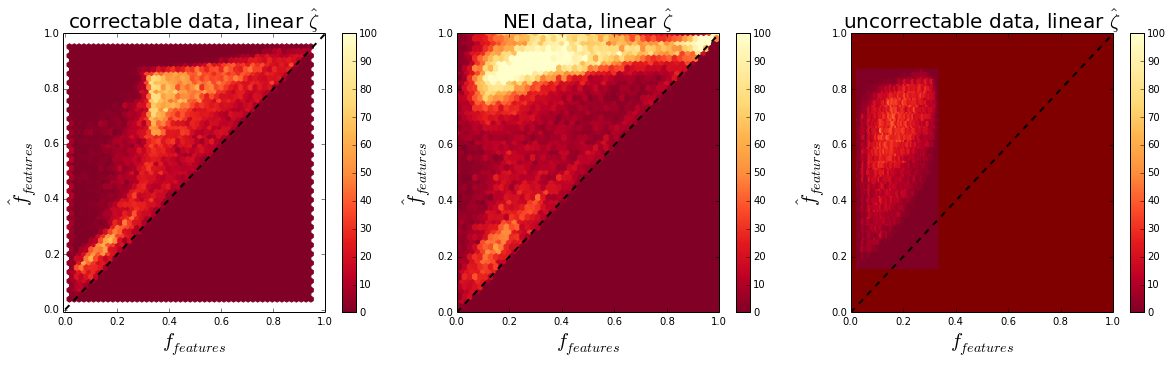

In [11]:
# 2D histogram of new p_features distribution
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
hex1 = ax1.hexbin(old_votes[correctable],new_c, cmap=plt.cm.YlOrRd_r,gridsize=50,vmin =0,vmax=100)
ax1.set_xlabel(r'$f_{features}$',fontsize=20)
ax1.set_ylabel(r'$\hat f_{features}$',fontsize=20)
cb1 = plt.colorbar(hex1)
ax1.set_title('correctable data, linear $\hat \zeta$',fontsize=20)

# Add the one-to-one line for comparision.
# Upper left = boosted p_features for z > 0.3
# Lower right = depressed p_features for z < 0.3

ax1.plot([0,1],[0,1],color='k',lw=2,ls='--')

# Try it with Mel's new function
ax2 = fig.add_subplot(132)
hex2 = ax2.hexbin(old_votes[nei],new_nei, cmap=plt.cm.YlOrRd_r,gridsize=50,vmax=100)
ax2.set_xlabel(r'$f_{features}$',fontsize=20)
ax2.set_ylabel(r'$\hat f_{features}$',fontsize=20)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
cb2 = plt.colorbar(hex2)
ax2.plot([0,1],[0,1],color='k',lw=2,ls='--')
ax2.set_title('NEI data, linear $\hat \zeta$',fontsize=20)

ax3 = fig.add_subplot(133)
hex3 = ax3.hexbin(old_votes[uncorrectable],new_unc, cmap=plt.cm.YlOrRd_r,gridsize=50,vmin =0, vmax=100)
ax3.set_xlabel(r'$f_{features}$',fontsize=20)
ax3.set_ylabel(r'$\hat f_{features}$',fontsize=20)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
cb3 = plt.colorbar(hex3)
ax3.plot([0,1],[0,1],color='k',lw=2,ls='--')
ax3.set_title('uncorrectable data, linear $\hat \zeta$',fontsize=20)
ax3.set_axis_bgcolor('#800000')

plt.savefig('linear_zeta.png')